Feature Importance Analysis for FPL AI (V1B)

This notebook loads the trained Random Forest model (model.pkl) and analyzes which features are most important in predicting total FPL points.
We will use both the built-in Random Forest feature_importances_ and SHAP for deeper interpretation.

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

MODEL_PATH = "../models/random_forest_model.pkl"
DATA_PATH = "../data/model_ready/2021-22_model_ready.csv"

with open(MODEL_PATH, "rb") as f:
    model = joblib.load(f)
    
print("Model loaded successfully:", type(model))

Model loaded successfully: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [3]:
X = pd.read_csv(DATA_PATH)

if "total_points" in X.columns:
    X = X.drop(columns=["total_points"])
    
feature_names = X.columns
print("Number of features:", len(feature_names))
X.head()

Number of features: 30


,element_type,gw,prev_total_points,prev_goals_scored,prev_assists,prev_minutes,prev_goals_conceded,prev_creativity,prev_influence,prev_threat,...,current_minutes,current_goals_conceded,current_creativity,current_influence,current_threat,current_bonus,current_ict_index,current_clean_sheets,current_cards_per_90,current_points_per_90
0,0,1,131.0,0.0,0.0,3131.0,37.0,0.0,702.2,2.0,...,90,2,0.0,11.8,0.0,0,1.2,0,0.0,0.00
1,0,2,131.0,0.0,0.0,3131.0,37.0,0.0,702.2,2.0,...,180,4,0.0,36.0,0.0,0,3.6,0,0.0,0.00
2,0,3,131.0,0.0,0.0,3131.0,37.0,0.0,702.2,2.0,...,270,9,0.0,79.0,0.0,0,7.9,0,0.0,1.33
3,0,4,131.0,0.0,0.0,3131.0,37.0,0.0,702.2,2.0,...,270,9,0.0,79.0,0.0,0,7.9,0,0.0,1.33
4,0,5,131.0,0.0,0.0,3131.0,37.0,0.0,702.2,2.0,...,270,9,0.0,79.0,0.0,0,7.9,0,0.0,1.33


In [4]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feature_importance_df.head(30)

,feature,importance
17,current_total_points,0.115199
25,current_bonus,0.104160
26,current_ict_index,0.089239
27,current_clean_sheets,0.072745
23,current_influence,0.070253
1,gw,0.059466
29,current_points_per_90,0.054706
20,current_minutes,0.052070
24,current_threat,0.040826
2,prev_total_points,0.033860


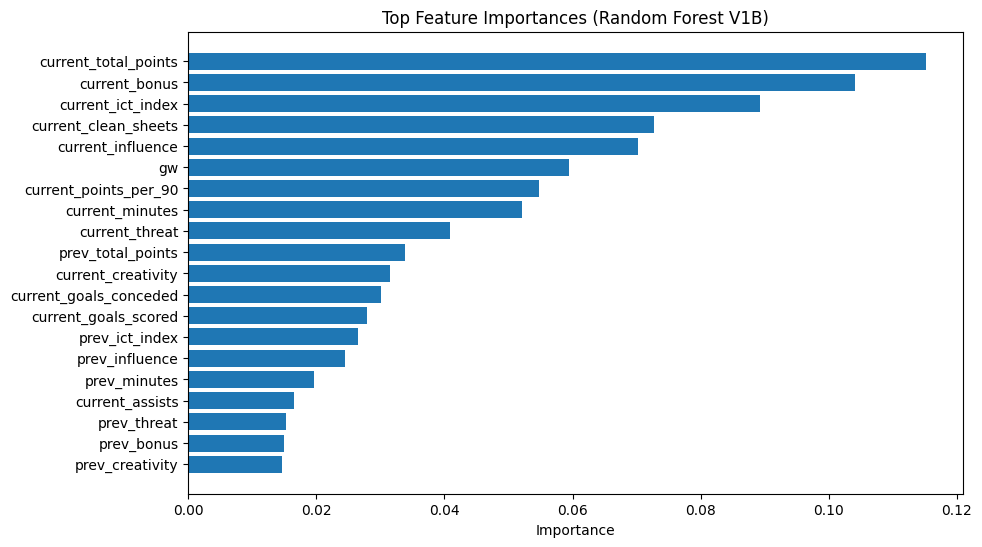

In [ ]:
# Plot top 20 features
top_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis() 
plt.xlabel("Importance") 
plt.title("Top Feature Importances (Random Forest V1B)") 
plt.show()


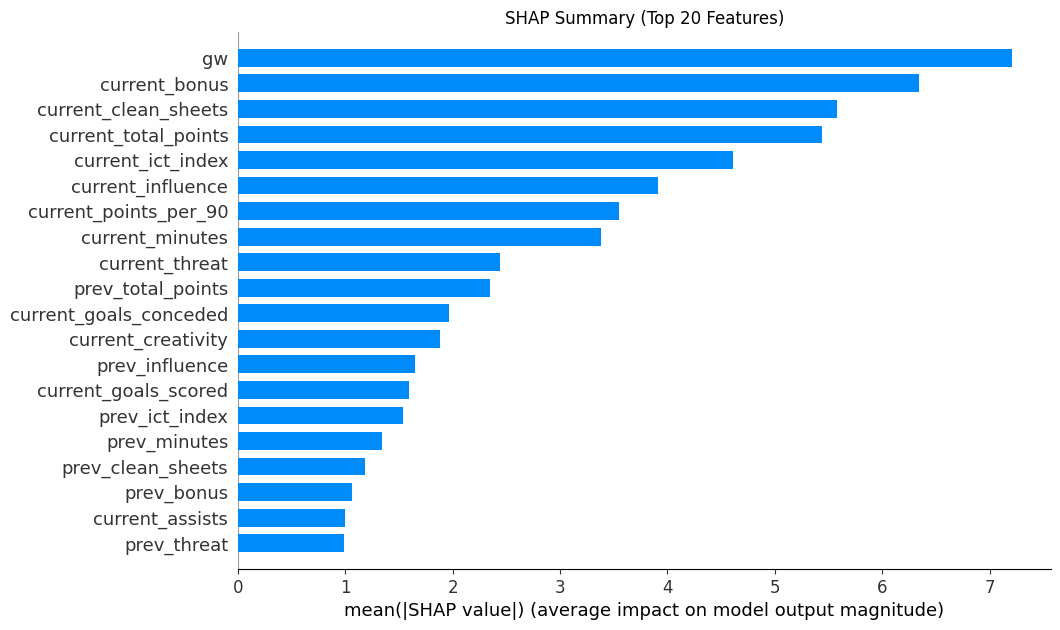

In [13]:
X_sample = X.sample(500, random_state=42)

explainer = shap.TreeExplainer(model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_sample, approximate=True)

plt.title("SHAP Summary (Top 20 Features)")
shap.summary_plot(shap_values, X_sample, plot_type="bar", max_display=20, show=False)
plt.gcf().set_size_inches(12, 6)
plt.xticks(fontsize=12)
plt.show()